# Day 21

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 다변수 이산확률변수의 결합/조건부확률

* 다변수 이산확률변수의 결합확률
* 다변수 이산확률변수의 주변확률
* 다변수 이산확률변수의 조건부확률

## 다변수 이산확률변수

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우에는 각각의 확률변수에 대한 확률분포 이외에도 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.

예를 들어 1부터 6까지의 값을 가지는 카테고리 분포 확률변수 $X$와 $Y$를 생각하자. 확률변수 각각의 확률적 특성은 확률질량함수(pmf) $ P_X(x), P_Y(y) $로 나타낼 수 있다. 확률질량함수의 아랫 첨자로 확률변수 이름을 지정하여 어떤 확률 변수의 확률밀도함수인지 표시한다.

확률밀도함수의 독립변수 $x$는 나타낼 수 있는 어떤 숫자, 종속변수 $P$는 그 숫자가 나타날 확률이다. 즉 $P_X(x=1)$ 또는 $P_X(1)$은 확률변수 $X$의 값이 1이 나올 확률이다.

## 결합 확률질량함수

이번에는 하나의 값이 아닌 두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우를 생각하자. 단변수 이산확률변수에서와 마찬가지로 하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면 임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있으므로 하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 결합 확률질량함수(joint probability mass function)이라고 하며 다음과 같이 표시한다.

$$ P_{XY}(x, y) $$

이 때는 나타날 수 있는 숫자가 두 숫자로 이루어진 쌍이므로 독립변수가 $x,y$ 두 개가 된다. 종속변수는 그 숫자 쌍이 나타날 확률이다. 즉, $P_{XY}(2, 3)$은 $(x=2, y=3)$이라는 특정한 숫자 쌍으로만 이루어진 사건의 확률이다.

다음은 6개의 카테고리 값을 가지는 두 개의 이산확률변수의 확률질량함수의 한 예이다.

In [5]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

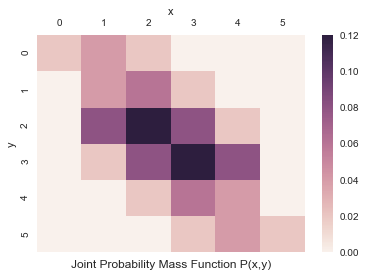

In [6]:
ax = sns.heatmap(pmf)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

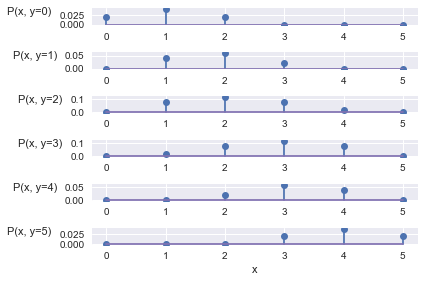

In [7]:
plt.subplot(611); plt.stem(pmf[0, :]); plt.ylabel("P(x, y=0)", rotation=0, labelpad=30)
plt.subplot(612); plt.stem(pmf[1, :]); plt.ylabel("P(x, y=1)", rotation=0, labelpad=30)
plt.subplot(613); plt.stem(pmf[2, :]); plt.ylabel("P(x, y=2)", rotation=0, labelpad=30)
plt.subplot(614); plt.stem(pmf[3, :]); plt.ylabel("P(x, y=3)", rotation=0, labelpad=30)
plt.subplot(615); plt.stem(pmf[4, :]); plt.ylabel("P(x, y=4)", rotation=0, labelpad=30)
plt.subplot(616); plt.stem(pmf[5, :]); plt.ylabel("P(x, y=5)", rotation=0, labelpad=30)
plt.xlabel("x")
plt.tight_layout()
plt.show()

## 주변 확률질량함수

**주변 확률질량함수(marginal probability mass function)**는 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수이다. 즉 다변수가 되기 이전의 단변수 확률질량함수를 말한다.

결합 확률질량함수에서 주변 확률질량함수를 구하려면 전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$$ 
\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} f_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} f_{XY}(x_i,y) \\
\end{align} 
$$

위에서 예로 든 이산 확률 변수의 경우에 주변 확률 질량 함수를 계산하면 다음과 같다.

$$ P_X(0) = P_{XY}(0,0) + P_{XY}(0,1) + P_{XY}(0,2) + P_{XY}(0,3) + P_{XY}(0,4) + P_{XY}(0,5) = 0.02 $$ 
$$ P_X(1) = P_{XY}(1,0) + P_{XY}(1,1) + P_{XY}(1,2) + P_{XY}(1,3) + P_{XY}(1,4) + P_{XY}(1,5) = 0.18 $$
$$ \vdots $$


In [8]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([ 0.02,  0.18,  0.3 ,  0.3 ,  0.18,  0.02])

In [9]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[ 0.08],
       [ 0.12],
       [ 0.3 ],
       [ 0.3 ],
       [ 0.12],
       [ 0.08]])

## 조건부 확률질량함수

조건부 확률질량함수(conditional probability mass function)는 다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률질량함수를 말한다. 조건부 확률질량함수는 다음과 같이 정의된다.


$$ P_{X \mid Y}(x \mid y) = \dfrac{P_{XY}(x, y)}{P_{Y}(y)} $$

$$ P_{Y \mid X}(y \mid x) = \dfrac{P_{XY}(x, y)}{P_{X}(x)} $$


조건부 확률질량함수의 모양은 결합질량함수 $P_{XY}(x, y)$에서 $y$값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다.

다만 조건부 확률질량함수의 합은 1이 된다.

위에서 예로 든 이산 확률 변수의 경우에 조건부 확률 질량 함수를 계산하면 다음과 같다.

In [10]:
pmf[0, :]

array([ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ])

In [11]:
np.sum(pmf[0, :])

0.080000000000000002

In [12]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0

array([ 0.25,  0.5 ,  0.25,  0.  ,  0.  ,  0.  ])

In [13]:
np.sum(cond_y0)

1.0

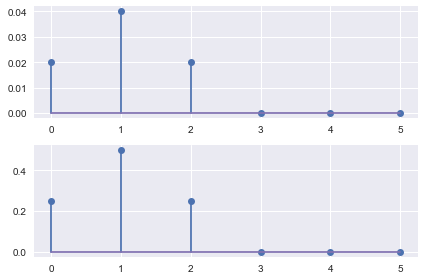

In [14]:
plt.subplot(211); plt.stem(pmf[0, :])
plt.subplot(212); plt.stem(cond_y0)
plt.tight_layout()
plt.show()

In [16]:
pmf[1, :]

array([ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ])

In [17]:
np.sum(pmf[1, :])

0.12000000000000001

In [18]:
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
cond_y1

array([ 0.        ,  0.33333333,  0.5       ,  0.16666667,  0.        ,  0.        ])

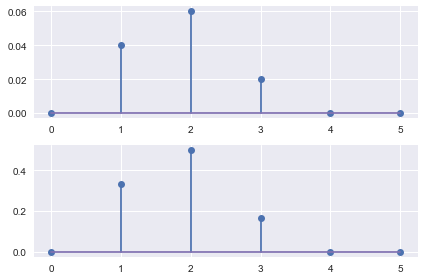

In [19]:
plt.subplot(211); plt.stem(pmf[1, :])
plt.subplot(212); plt.stem(cond_y1)
plt.tight_layout()
plt.show()


---


# 다변수 연속확률변수의 결합/조건부확률

연속확률분포에서는 이산확률분포와 같이 아톰(atom)을 이용한 확률의 정의가 불가능하므로 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용한다.

## 결합 누적확률분포함수

두 확률 변수 $X$, $Y$에 대한 결합 누적확률분포함수 $F_{XY}(x, y) $는 다음과 같이 정의한다.

$$ F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(X < x, Y < y) $$

만약 구간의 끝을 나타내는 두 독립 변수 $x$, $y$중 하나가 무한대 값을 가지는 경우에는 해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적확률분포함수로 줄어든다. 이를 **주변 누적확률분포(marginal cumulative probability distribution)**이라고 한다.

$$ F_X(x)=F_{XY}(x, \infty) $$

$$ F_Y(x)=F_{XY}(\infty, y) $$

결합 누적확률분포함수 $F_{XY}(x, y) $는 다음과 같은 특성을 가진다.

$$ F_{XY}(\infty, \infty)=1 $$

$$ F_{XY}(-\infty, y)=F_{XY}(x,-\infty)=0 $$

## 결합 확률밀도함수

단변수 확률변수의 경우처럼  결합 누적확률분포함수를 미분하여 결합 확률밀도함수를 정의할 수 있다. 다만 이 경우에는 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.

$$ f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y} $$

결합 확률 밀도 함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.

$$  \int_{x_1}^{x_2} \int_{y_1}^{y_2} f_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big)  $$

따라서 결합 확률 밀도 함수를 모든 변수에 대해 $-\infty$에서 $\infty$ 까지 적분하면 값이 1이 된다.

$$  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1 $$

연속 확률 변수의 결합 확률 밀도 함수는 2차원 함수가 된다. 아래는 다변수 정규 분포의 fro결합 확률 밀도의 예를 그린 것이다.

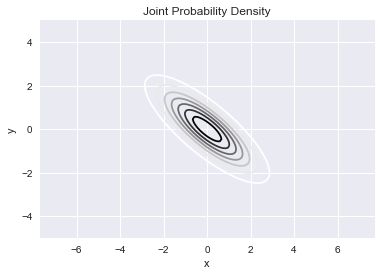

In [213]:
from scipy.stats import multivariate_normal
mu = [0, 0]
cov = [[2, -1.4],[-1.4, 1.5]]
rv = multivariate_normal(mu, cov)
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density")
plt.axis("equal")
plt.show()

동일한 결합 확률 밀도 함수를 3차원으로 그리면 아래와 같다.

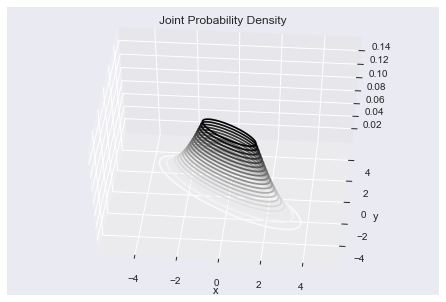

In [214]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ, levels=np.linspace(0, 0.1, 20))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Joint Probability Density")
ax.view_init(50, -85)
plt.show()

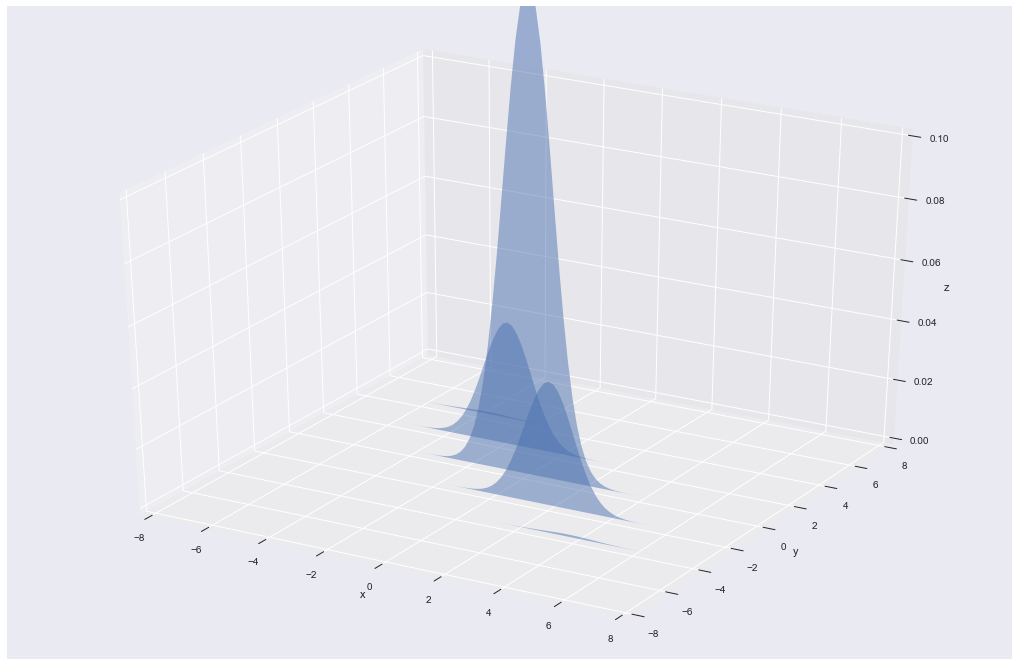

In [269]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(-8, 8, 100)
yy = np.linspace(-8, 8, 9)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_xlim3d(-8, 8)
ax.set_ylabel('y')
ax.set_ylim3d(-8, 8)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.1)
plt.show()

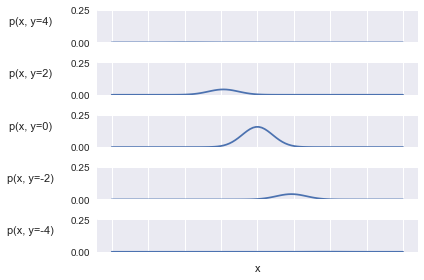

In [276]:
for i, j in enumerate(range(6, 1, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.25)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

## 주변 확률밀도함수

**주변 확률밀도함수(marginal probability density function)**는 결합 확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값을 말한다. 따라서 결합 확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구한다. 

가중평균(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률 변수의 주변 확률 밀도 함수는 1차원 함수가 된다.

$$ 
\begin{align}%\label{}
\nonumber  f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y)dy \\
\nonumber  f_Y(y) = \int_{-\infty}^{\infty} f_{XY}(x,y)dx
\end{align} 
$$

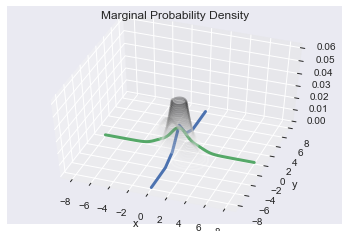

In [272]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(XX, YY, 0.4*ZZ, levels=np.linspace(0, 0.04, 30), alpha=0.3)
ax.plot(yy, ZZ.mean(axis=1), zdir='x', lw=3)
ax.plot(xx, ZZ.mean(axis=0), zdir='y', lw=3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Marginal Probability Density")
ax.view_init(50, -70)
plt.show()

## 조건부 확률밀도함수

조건부 확률밀도함수(conditional probability density function)는 다변수 확률 변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우, 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수를 말한다. 

$$ f_{X \mid Y}(x \mid y_0) = \dfrac{f_{XY}(x, y=y_0)}{f_{Y}(y_0)} $$

$$ f_{Y \mid X}(y \mid x_0) = \dfrac{f_{XY}(x, y=y_0)}{f_{X}(x_0)} $$

주변 확률밀도함수와 마찬가지로 차원이 감소하지만 모양은 달라진다.

# 확률 밀도 함수의 독립

만약 두 확률 변수 $X$, $Y$의 결합 확률 밀도 함수(joint pdf)가 주변 확률 밀도 함수(marginal pdf)의 곱으로 나타나면 두 확률 변수가 서로 독립(independent)이라고 한다.

$$ f_{XY}(x, y) = f_X(x)f_Y(y) $$


이 함수 식에서 볼 수 있듯이 독립인 경우에는 각각의 주변 확률 밀도 함수만으로 결합 확률 밀도 함수가 결정된다. 즉, $Y$가 어떤 값을 가지더라도 $X$의 주변 확률 밀도 함수는 변하지 않는다.

## 반복시행


같은 확률변수에서 여러개의 표본 데이터를 취하는 경우에는 독립인 두 개의 확률변수에서 나온 표본으로 볼 수 있다.

따라서 확률밀도함수가 $f(x)$이고 표본 데이터가 $\{x_1, x_2, x_3, \cdots, x_N \}$이면 이 데이터 집합이 나올 수 있는 확률은 다음과 같다.

$$ \prod_{i=1}^N f(x_i) $$  
 

## 독립 확률 변수의 기댓값

독립 확률 변수들의 기댓값은 다음 성질을 만족한다. 

$$ \text{E}[XY] = \text{E}[X]\text{E}[Y] $$

(증명)

$$ 
\begin{eqnarray}
\text{E}[XY] 
&=& \int xy \;f_{XY}(x, y) \; dx dy  \\
&=& \int xy \;f_{X}(x)f_{Y}(y) \; dx dy \\
&=& \int x \;f_{X}(x) \; dx \int y \;f_{Y}(y) \; dy  \\
&=& \text{E}[X] \text{E}[Y] \\
\end{eqnarray}
$$

## 독립 확률 변수들의 분산

또한 독립 확률 변수들의 분산은 다음 성질을 만족한다. 

$$ \text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y] $$

(증명)

$$ 
\begin{eqnarray}
\text{Var}[X + Y] 
&=& \text{E}[((X + Y) - (\mu_X + \mu_Y))^2] \\
&=& \text{E}[(X+Y)^2 - 2(X+Y)(\mu_X + \mu_Y) + (\mu_X + \mu_Y)^2] \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)\text{E}[X+Y] + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)^2 + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[XY]+\text{E}[Y^2] - (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[X]\text{E}[Y]+\text{E}[Y^2] - (\mu_X^2 + 2\mu_X\mu_Y + \mu_Y^2) \\
&=& \text{E}[X^2]-\mu_X^2+\text{E}[Y^2]-\mu_Y^2+2\text{E}[X]\text{E}[Y] - 2\mu_X\mu_Y \\
&=& \text{Var}[X]+\text{Var}[Y] \\
\end{eqnarray}
$$

## 조건부 확률분포

독립인 두 확률변수 $X, Y$의 조건부 확률밀도함수는 주변 확률밀도함수와 같다.

$$ f_{X \mid Y} (x | y_0) = \dfrac{f_{XY}(x, y=y_0)}{f_{Y}(y_0)} = \dfrac{f_{X}(x) f_{Y}(y_0)}{f_{Y}(y_0)} = f_{X}(x) $$

$$ f_{Y \mid X} (y | x_0) = \dfrac{f_{XY}(x=x_0, y)}{f_{X}(x_0)} = \dfrac{f_{X}(x_0) f_{Y}(y)}{f_{X}(x_0)} = f_{Y}(y) $$

확률 변수 $X$가 다른 확률 변수 $Y$에 독립이면 조건부 확률 분포가 조건이 되는 확률 변수의 값에 영향을 받지 않는다. 즉, $Y$ 값이 $y_1$일 때와 $y_2$일 때의 조건부 확률 분포 $f(x \mid y_1)$과 $f(x \mid y_2)$이 같다는 의미이다. 

예를 들어 다음과 같은 두 이산 확률 변수의 결합 확률 분포를 보자.

In [277]:
np.set_printoptions(precision=4)
pmf1 = np.array([[0, 1, 2, 3, 2, 1],
                 [0, 2, 4, 6, 4, 2],
                 [0, 4, 8,12, 8, 4],
                 [0, 2, 4, 6, 4, 2],
                 [0, 1, 2, 3, 2, 1]])
pmf1 = pmf1/pmf1.sum()
pmf1

array([[ 0.    ,  0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.    ,  0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.    ,  0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.    ,  0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.    ,  0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

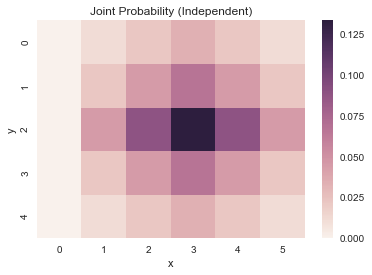

In [278]:
sns.heatmap(pmf1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Independent)")
plt.show()

In [279]:
pmf1_marginal_x = pmf1.sum(axis=0)
pmf1_marginal_y = pmf1.sum(axis=1)
pmf = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
pmf/pmf.sum()

array([[ 0.    ,  0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.    ,  0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.    ,  0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.    ,  0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.    ,  0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

In [280]:
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([ 0.    ,  0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [281]:
cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y1

array([ 0.    ,  0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [282]:
cond_x_y2 = pmf1[2, :]/pmf1_marginal_y[2]
cond_x_y2

array([ 0.    ,  0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [283]:
pmf2 = np.array([[0, 0, 0, 0, 1, 1],
                 [0, 0, 1, 2, 1, 0],
                 [0, 1, 3, 3, 1, 0],
                 [0, 1, 2, 1, 0, 0],
                 [1, 1, 0, 0, 0, 0]])
pmf2 = pmf2/pmf2.sum()
pmf2

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.15,  0.15,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.1 ,  0.05,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.  ,  0.  ,  0.  ,  0.  ]])

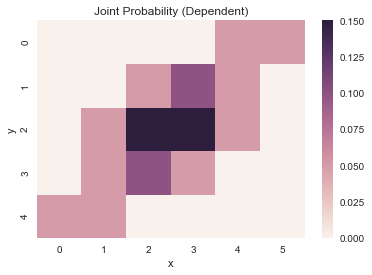

In [284]:
sns.heatmap(pmf2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Dependent)")
plt.show()

In [285]:
pmf2_marginal_x = pmf2.sum(axis=0)
pmf2_marginal_y = pmf2.sum(axis=1)

In [286]:
cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
cond_x_y0

array([ 0. ,  0. ,  0. ,  0. ,  0.5,  0.5])

In [287]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([ 0.  ,  0.  ,  0.25,  0.5 ,  0.25,  0.  ])

In [288]:
cond_x_y2 = pmf2[2, :]/pmf2_marginal_y[2]
cond_x_y2

array([ 0.   ,  0.125,  0.375,  0.375,  0.125,  0.   ])

두 확률 변수가 독립이 아닌 경우, 즉 결합 확률 분포(확률 밀도 함수 또는 확률 질량 함수)가 두 개의 주변 분포의 곱으로 나누어지지 않는 경우에는 두 확률 변수가 서로 **의존(dependent)**한다고 한다. 


예를 들어 5명이 있는 어떤 반에서 한 명을 대표로 뽑아 시험을 보아야 한다고 하자. 

위 확률 분포 $X$, $Y$에서 $Y$가 학생의 번호가 되고 $X \mid Y$는 반 대표가 된 학생의 시험 점수이다. 

첫번째(독립) 경우에는 어떤 학생이 대표가 된다고 하더라도 시험 점수의 분포가 동일하지만 두번째(의존) 경우에는 0번 학생이 뽑인다면 4점, 혹은 5점을 받고 4번 학생이 뽑이면 0점 또는 1점을 받게 되므로 조건부 시험 점수 $X \mid Y$ 는 $Y$ 값에 의존한다고 말할 수 있다.

# 공분산과 상관계수

두 개 이상의 서로 관련을 가지는 자료 값의 집합들이나 혹은 확률 변수들의 관계 즉 결합 분포는 heatmap과 같은 서술 통계 방법으로 묘사하거나 결합 확률 분포를 사용하여 정의한다.

다변수 확률 변수도 단변수의 경우처럼 평균, 분산과 같은 대표값을 가질 수 있다. 그 중 가장 중요한 것이 자료 간의 상관 관계를 나타내는 공분산(covariance)과 상관계수(correlation coefficient)이다. 공분산과 상관계수도 샘플 자료 집합에 대해 정의되는 샘플 공분산, 샘플 상관계수와 확률 변수에 대해 정의되는 공분산, 상관계수가 있다.

## 샘플 공분산

샘플 공분산(sample covariance)은 다음과 같이 정의된다. 여기에서 $x_i$와 $y_i$는 각각 $i$번째의 $x$ 자료와 $y$자료의 값을 가리키고, $m_x$와 $m_y$는 $x$ 자료와 $y$자료의 샘플 평균을 가리킨다.

$$ s^2_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y) $$

샘플 분산과 마찬가지로 샘플 공분산도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸것이다. 공분산은 평균값 위치와 샘플 위치를 연결하는 사각형의 면적을 사용한다. 다만 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다.

## 샘플 상관계수

샘플 공분산은 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다. 그런데 분포의 크기는 공분산이 아닌 분산만으로도 알 수 있기 때문에 대부분의 경우 자료 분포의 방향성만 분리하여 보는 것이 유용한다. 이 때 필요한 것이 샘플 상관계수(sample correlation coefficient)이다.

샘플 상관계수는 다음과 같이 공분산을 각각의 샘플 표준편차값으로 나누어 정규화(normalize)하여 정의한다.


$$ r_{xy} = \dfrac{s^2_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}} $$



## 확률 변수의 공분산과 상관계수

두 확률 변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.

$$ \text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$$

마찬가지로 두 확률 변수 $X$와 $Y$의 상관 계수도 다음과 같이 정의한다.

$$ \rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}} $$

확률 변수의 상관계수는 다음과 같은 성질을 가진다.

$$ -1 \leq \rho \leq 1 $$



또한 $\rho$가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.

* $\rho = 1$ : 완전 선형 상관 관계
* $\rho = 0$ : 무상관 (독립과는 다름)
* $\rho = −1$ : 완전 선형 반상관 관계



<img src="https://datascienceschool.net/upfiles/e01bb77e55da4dbc8fb3fd60a707b050.png" style="width: 100%;">

### 다변수 확률 변수의 공분산

다변수 확률변수의 경우, 즉, 데이터가 벡터인 경우에는 다음과 같이 샘플 공분산 행렬을 정의할 수 있다. 여기에서 $M$는 $X$ 데이터와 $Y$ 데이터를 결합하고(concatenate) 평균을 제거하여 샘플 평균이 0이 된 데이터 행렬(feature matrix)를 뜻한다. $N$은 데이터의 갯수이다.

$$ S^2 = \dfrac{1}{N} M^TM $$

렬과 (이론적) 공분산 행렬은 다음과 같이 정의된다. 여기에서는 확률변수 $X$, $Y$가 각각 다변수 확률변수이다.

$$ \Sigma = \text{Cov}[X, Y] = \text{E} \left[ (X - \text{E}[X])(Y - \text{E}[Y])^T \right] $$

# 모멘트 방법

모멘트 방법(Method of Moment)은 샘플자료에 대한 샘플 모멘트가 확률 변수의 이론적인 모멘트와 같다고 가정하고 모수를 구하는 방법이다.

1차 모멘트(기댓값, 평균)의 경우, 다음과 같은 식이 성립한다고 가정한다.

* 이론적인 모형 평균 $\mu = \text{E}[X]$ = 샘플 평균 $\bar{x}$

$$ \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i $$


2차 모멘트(분산)의 경우에는 다음과 같다.

* 이론적인 모형 분산 $\sigma^2 = \text{E}[(X-\mu)^2]$ = 샘플 분산 s^2 
 
$$ \bar{s}^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2 $$


## 베르누이 분포의 모수 추정

MM 방법으로 베르누이 분포의 모수 $\theta$를 구하면 다음과 같다.

$$ \text{E}[X] = \theta = \dfrac{1}{N} \sum_{i=1}^N x_i  = \dfrac{N1}{N} $$

## 정규 분포의 모수 추정

MM 방법으로 정규 분포의 모수 $\mu$, $\sigma^2$를 구하면 다음과 같다.


$$ \text{E}[X] = \mu = \dfrac{1}{N} \sum_{i=1}^N x_i  = \bar{x} $$

$$ \text{E}[(X-\mu)^2] = \sigma^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 = s^2 $$

## 베타 분포의 모수 추정

MM 방법으로 베타 분포의 모수 $a$, $b$를 구하면 다음과 같다.



$$ \text{E}[X] = \dfrac{a}{a+b} = \bar{x}  $$

$$ \text{E}[(X-\mu)^2] = \dfrac{ab}{(a+b)^2(a+b+1)} = s^2 $$


이를 풀면 다음과 같다.

$$ a = \bar{x} \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right) $$

$$ b = (1 - \bar{x}) \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right) $$

In [297]:
from scipy.stats import beta
np.random.seed(0)
x = beta(15,12).rvs(100)

def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b

print(estimate_beta(x))

(14.944988716019022, 12.606691604488812)
